In [ ]:
pip install transformers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch.nn import functional as F
from tqdm import tqdm
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
import re
import os
import sys
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Book1.csv')
df


,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


<Axes: title={'center': 'percentage rating of drugs'}, ylabel='Counts'>

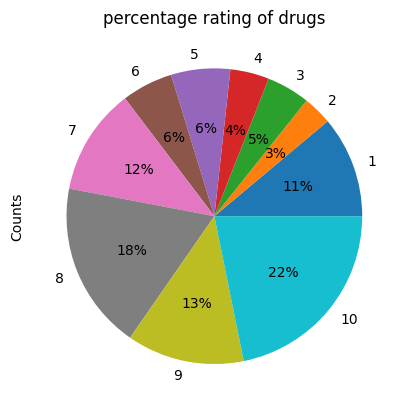

In [ ]:
df.groupby(['rating']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='percentage rating of drugs')

In [ ]:
!pip install nltk

In [ ]:
!pip install stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#lowercasing first 10 texts
df['Reviews'] = df['commentsReview'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Reviews'] = df['commentsReview'].str.replace('[^\w\s]',"")
df.commentsReview

<ipython-input-22-29512a36ba7d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['commentsReview'].str.replace('[^\w\s]',"")


0       Took the antibiotics for 14 days. Sinus infect...
1       Severe mood swings between hypomania and depre...
2       Depakote was prescribed to me by a Kaiser psyc...
3       This drug may not be for everyone but its wond...
4       Drug was taken in gelatin tablet at 0.5 mg per...
                              ...                        
1031    Treatment period is 3 months/12 weeks. Dosage ...
1032    I use the albuterol as needed because of aller...
1033    This drug is highly teratogenic ,females must ...
1034    Divigel is a topically applied Bio-Identical H...
1035                 Stopped using it for the time being.
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
#removing stopwords
stop = stopwords.words('english')
df['Reviews'] = df['commentsReview'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.commentsReview

0       Took the antibiotics for 14 days. Sinus infect...
1       Severe mood swings between hypomania and depre...
2       Depakote was prescribed to me by a Kaiser psyc...
3       This drug may not be for everyone but its wond...
4       Drug was taken in gelatin tablet at 0.5 mg per...
                              ...                        
1031    Treatment period is 3 months/12 weeks. Dosage ...
1032    I use the albuterol as needed because of aller...
1033    This drug is highly teratogenic ,females must ...
1034    Divigel is a topically applied Bio-Identical H...
1035                 Stopped using it for the time being.
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
#lemmatizing
df['Reviews'] = df['commentsReview'].apply(lambda x: " ".join([Word(word).lemmatize()
for word in x.split()]))
df.commentsReview

0       Took the antibiotics for 14 days. Sinus infect...
1       Severe mood swings between hypomania and depre...
2       Depakote was prescribed to me by a Kaiser psyc...
3       This drug may not be for everyone but its wond...
4       Drug was taken in gelatin tablet at 0.5 mg per...
                              ...                        
1031    Treatment period is 3 months/12 weeks. Dosage ...
1032    I use the albuterol as needed because of aller...
1033    This drug is highly teratogenic ,females must ...
1034    Divigel is a topically applied Bio-Identical H...
1035                 Stopped using it for the time being.
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
# Assume binary classification (positive/negative sentiment)
# You may need to adjust the labels based on your dataset
df['label'] = data['rating'].apply(lambda x: 1 if x >= 5 else 0)



In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)




In [ ]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize the input data
def tokenize_data(data, max_length=128):
    input_ids = []
    attention_masks = []

    for review in data['commentsReview']:
        encoded_data = tokenizer.encode_plus(
            review,
            max_length=max_length,
            add_special_tokens=True,
            return_attention_mask=True,
            pad_to_max_length=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(data['label'].values)

    return input_ids, attention_masks, labels



In [ ]:
# Tokenize the training and testing data
train_input_ids, train_attention_masks, train_labels = tokenize_data(train_df)
test_input_ids, test_attention_masks, test_labels = tokenize_data(test_df)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
batch_size = 32
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss}")



Epoch 1/3: 100%|██████████| 26/26 [15:38<00:00, 36.09s/it]


Epoch 1/3, Average Training Loss: 0.526441304729535


Epoch 2/3: 100%|██████████| 26/26 [15:22<00:00, 35.48s/it]


Epoch 2/3, Average Training Loss: 0.49269545536774856


Epoch 3/3: 100%|██████████| 26/26 [15:20<00:00, 35.41s/it]

Epoch 3/3, Average Training Loss: 0.38666520439661467


In [ ]:
# Evaluate the model on the test set
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted_labels = torch.max(logits, dim=1)
        predictions.extend(predicted_labels.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy:{accuracy}')

Accuracy:0.8509615384615384
